## Import Packages

In [296]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # import color map

from sympy import symbols, diff # import sympy module
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Example 1 - A simple cost function

$f(x) = x^2 + x + 1$

In [216]:
def f(x):
    return x**2 + x + 1

In [217]:
# Make Data

x_1 = np.linspace(start = -3, stop = 3, num = 500)

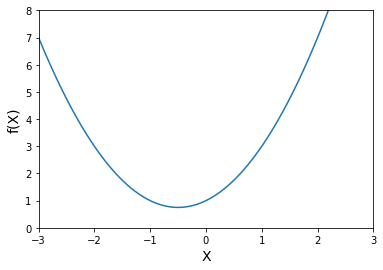

In [218]:
# plot
plt.xlim([-3, 3])
plt.ylim([0, 8])

plt.xlabel('X', fontsize = 14)
plt.ylabel('f(X)', fontsize = 14)

plt.plot(x_1, f(x_1))
plt.show()

## Slope and Derivatives
Create a python function to find derivative of f(x) called df(x)

In [219]:
def df(x):
    return (2*x + 1)

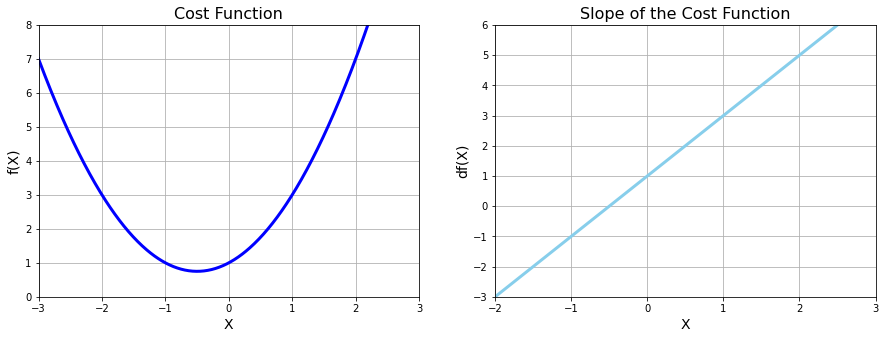

In [220]:
# plot function and derivative side by side

plt.figure(figsize=[15, 5])

# Chart-1 for cost function
plt.subplot(1, 2, 1)

plt.xlim([-3, 3])
plt.ylim([0, 8])

plt.title('Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('f(X)', fontsize = 14)
plt.grid()

plt.plot(x_1, f(x_1), color = 'blue', linewidth = 3)

# Chart-2 for Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('df(X)', fontsize = 14)
plt.grid()

plt.xlim([-2, 3])
plt.ylim([-3, 6])

plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 3)


plt.show()

## Gradient Descent

In [221]:
# Gradient Descent

new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = .0001

x_list = [new_x]
slope_list =[df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    #print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many times:', n)
        break
    
print('Local minimum occurs at:', new_x)
print('Slope od df(x) value at this point si:', df(new_x))
print('f(x) value or cost at this point is:', f(new_x))

Loop ran this many times: 40
Local minimum occurs at: -0.49962781616118024
Slope od df(x) value at this point si: 0.0007443676776395236
f(x) value or cost at this point is: 0.7500001385208099


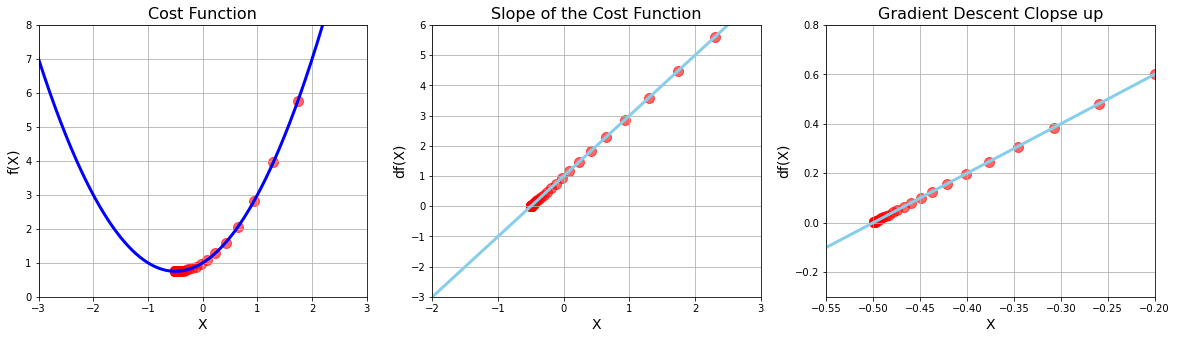

In [222]:
# Gradient descent on plot

plt.figure(figsize=[20, 5])

# Chart-1 for cost function
plt.subplot(1, 3, 1)

plt.xlim([-3, 3])
plt.ylim([0, 8])

plt.title('Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('f(X)', fontsize = 14)
plt.grid()

plt.plot(x_1, f(x_1), color = 'blue', linewidth = 3)

values = np.array(x_list)
plt.scatter(x_list, f(values), color = 'red', s = 100, alpha = 0.6)

# Chart-2 for Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('df(X)', fontsize = 14)
plt.grid()

plt.xlim([-2, 3])
plt.ylim([-3, 6])

plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 3)
plt.scatter(x_list, slope_list, color = 'red', s =100, alpha = .6)

# Chart-2 for Derivative
plt.subplot(1, 3, 3)

plt.title('Gradient Descent Clopse up', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('df(X)', fontsize = 14)
plt.grid()

plt.xlim([-0.55, -0.2])
plt.ylim([-0.3, 0.8])

plt.plot(x_1, df(x_1), color = 'skyblue', linewidth = 3)
plt.scatter(x_list, slope_list, color = 'red', s =100, alpha = .6)

plt.show()

## Example 2 - Multiple Minima vs Initial Guess & Advanced Functions 

$g(x) = x^4 - 4x^2 + 5$

In [223]:
# Make Data
x_2 = np.linspace(start = -2, stop = 2, num = 1000)

def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

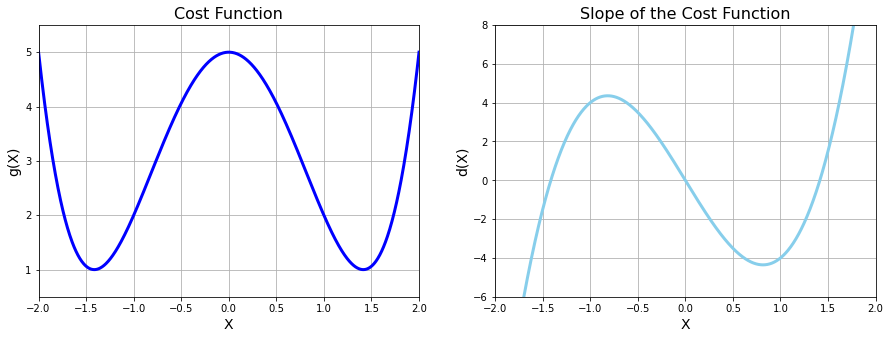

In [224]:
# plot function and derivative side by side

plt.figure(figsize=[15, 5])

# Chart-1 for cost function
plt.subplot(1, 2, 1)

plt.xlim([-2, 2])
plt.ylim([0.5, 5.5])

plt.title('Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('g(X)', fontsize = 14)
plt.grid()

plt.plot(x_2, g(x_2), color = 'blue', linewidth = 3)

# Chart-2 for Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('d(X)', fontsize = 14)
plt.grid()

plt.xlim([-2, 2])
plt.ylim([-6, 8])

plt.plot(x_2, dg(x_2), color = 'skyblue', linewidth = 3)


plt.show()

## Gradient Descent as a Python Function

In [225]:
# def gradient_descent(derivative_func, initial_guess, multiplier, precision): (without default value)
# def gradient_descent(derivative_func, initial_guess, multiplier = 0.02, precision = 0.001):

def gradient_descent(derivative_func, initial_guess, multiplier = 0.02, precision = 0.001, max_iter = 300):
    

    new_x = initial_guess
    

    x_list = [new_x]
    slope_list =[derivative_func(new_x)]

    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient

        step_size = abs(new_x - previous_x)
        #print(step_size)

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step_size < precision:
            #print('Loop ran this many times:', n)
            break
    return new_x, x_list, slope_list

In [226]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess=0.5)
print('Local min occurs at:', local_min)
print('Number do steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number do steps: 23


In [227]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number do steps:', len(list_x))

Local min occurs at: -1.4120887490901561
Number do steps: 34


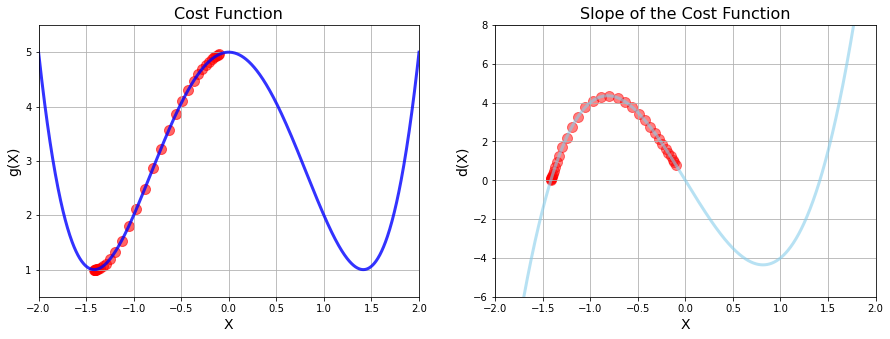

In [228]:
# Calling gradient descent function

local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= -0.1)

# plot function, derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# Chart-1 for cost function
plt.subplot(1, 2, 1)

plt.xlim([-2, 2])
plt.ylim([0.5, 5.5])

plt.title('Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('g(X)', fontsize = 14)
plt.grid()

plt.plot(x_2, g(x_2), color = 'blue', linewidth = 3, alpha = 0.8)
plt.scatter(list_x, g(np.array(list_x)), color ='red', s = 100, alpha = 0.6)

# Chart-2 for Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('d(X)', fontsize = 14)
plt.grid()

plt.xlim([-2, 2])
plt.ylim([-6, 8])

plt.plot(x_2, dg(x_2), color = 'skyblue', linewidth = 3, alpha = 0.6)
plt.scatter(list_x, deriv_list, color ='red', s = 100, alpha = 0.5)


plt.show()

## Example 3 - Divergence, Overflow and Python Tuples

$h(x) = x^5 - 2x^4 + 2$

In [229]:
# Make Data
x_3 = np.linspace(start = -2.5, stop =2.5, num = 1000)

def h(x):
    return x**5 -2*x**4 + 2

def dh(x):
    return 5*x**4 -8*x**3

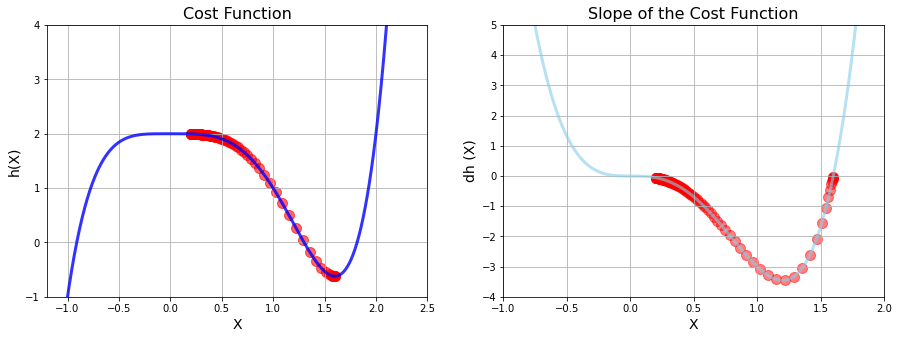

Local min occurs at: 1.5989534547394717
Cost at this minimum is: -0.6214287992331258
Number of steps: 117


In [230]:
# Calling gradient descent function

local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess= 0.2)

# plot function, derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# Chart-1 for cost function
plt.subplot(1, 2, 1)

plt.xlim([-1.2, 2.5])
plt.ylim([-1, 4])

plt.title('Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('h(X)', fontsize = 14)
plt.grid()

plt.plot(x_3, h(x_3), color = 'blue', linewidth = 3, alpha = 0.8)
plt.scatter(list_x, h(np.array(list_x)), color ='red', s = 100, alpha = 0.6)

# Chart-2 for Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('dh (X)', fontsize = 14)
plt.grid()

plt.xlim([-1, 2])
plt.ylim([-4, 5])

plt.plot(x_3, dh(x_3), color = 'skyblue', linewidth = 3, alpha = 0.6)
plt.scatter(list_x, deriv_list, color ='red', s = 100, alpha = 0.5)


plt.show()

print('Local min occurs at:', local_min)
print('Cost at this minimum is:', h(local_min))
print('Number of steps:', len(list_x))

In [231]:
import sys

In [232]:
sys.version

'3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]'

In [233]:
sys.float_info.max

1.7976931348623157e+308

## pitfalls & Overflow Error

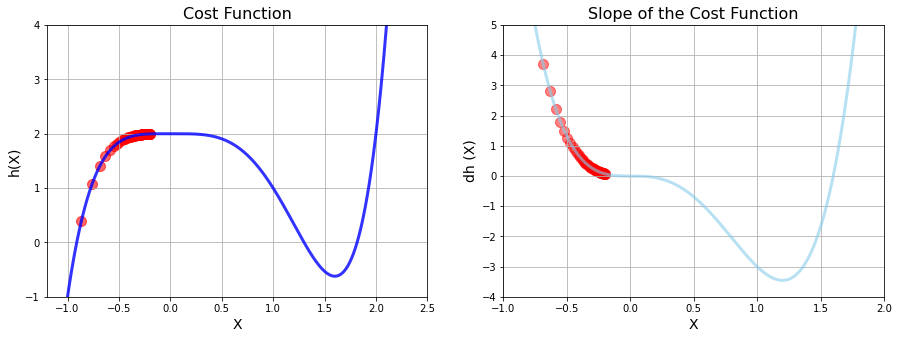

Local min occurs at: -1.8398461123332792e+24
Cost at this minimum is: -2.1081790694225687e+121
Number of steps: 72


In [234]:
# Calling gradient descent function

local_min, list_x, deriv_list = gradient_descent(derivative_func=dh, initial_guess= -0.2, max_iter = 71)

# plot function, derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# Chart-1 for cost function
plt.subplot(1, 2, 1)

plt.xlim([-1.2, 2.5])
plt.ylim([-1, 4])

plt.title('Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('h(X)', fontsize = 14)
plt.grid()

plt.plot(x_3, h(x_3), color = 'blue', linewidth = 3, alpha = 0.8)
plt.scatter(list_x, h(np.array(list_x)), color ='red', s = 100, alpha = 0.6)

# Chart-2 for Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the Cost Function', fontsize = 16)
plt.xlabel('X', fontsize = 14)
plt.ylabel('dh (X)', fontsize = 14)
plt.grid()

plt.xlim([-1, 2])
plt.ylim([-4, 5])

plt.plot(x_3, dh(x_3), color = 'skyblue', linewidth = 3, alpha = 0.6)
plt.scatter(list_x, deriv_list, color ='red', s = 100, alpha = 0.5)


plt.show()

print('Local min occurs at:', local_min)
print('Cost at this minimum is:', h(local_min))
print('Number of steps:', len(list_x))

## 3D Chart Data viz
### Minimise $$f(x, y) = \frac{1}{3^{-x^2-y^2} +1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2-y^2}$

In [235]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [236]:
# Make Data

x_4 = np.linspace(start = -2, stop = 2, num = 200)
y_4 = np.linspace(start = -2, stop = 2, num = 200)

print('Shape of X array:', x_4.shape) 

x_4, y_4 = np.meshgrid(x_4, y_4) # transform the array from 1d to 2d
print('Array after meshgrid:', x_4.shape)


Shape of X array: (200,)
Array after meshgrid: (200, 200)


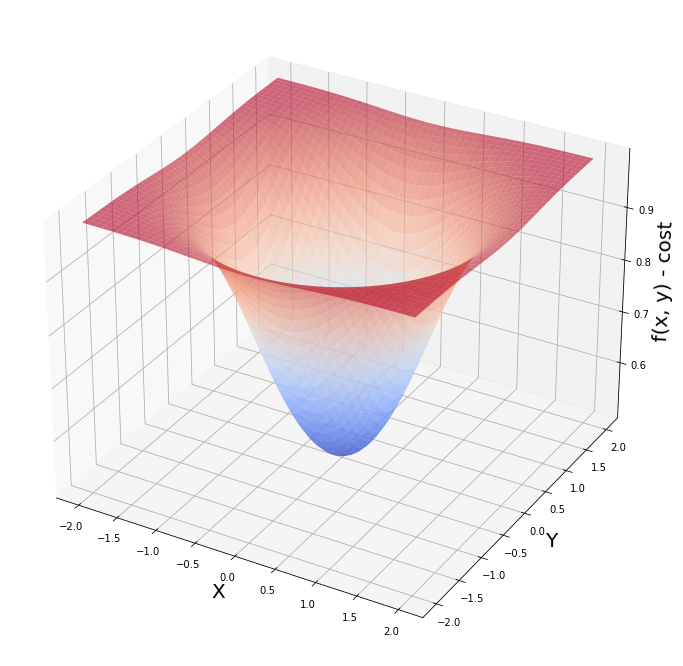

In [237]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('X', fontsize = 20)                            # add label
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('f(x, y) - cost', fontsize = 20)


ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap = cm.coolwarm, alpha = 0.6)  # add color map( from matplotlib import cm)

plt.show()

## Partial Derivatives and Symbolic Computation

## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left (3^{-x^2 - y^2} +1 \right)^2}$$
## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left (3^{-x^2 - y^2} +1 \right)^2}$$

In [238]:
a, b = symbols('x, y')                                          # using the sympy module assinging the value of x and y 
print('Our cost function f(x, y) is:', f(a, b))
print('Partial derivative respect to x is:', diff(f(a, b), a))  # doing the differetiation respect to a

print('Value of f(x, y) at x = 1.8 and y = 1.0 is:', 
      f(a, b).evalf(subs = {a: 1.8, b: 1.0}))                   # evaluting the function using python dictionary
print('Value of partial derivative respect to x is:',
      diff(f(a, b), a).evalf(subs = {a: 1.8, b: 1.0}))


Our cost function f(x, y) is: 1/(3**(-x**2 - y**2) + 1)
Partial derivative respect to x is: 2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x, y) at x = 1.8 and y = 1.0 is: 0.990604794032582
Value of partial derivative respect to x is: 0.0368089716197505


## Batch Gradient Descent with SymPy

In [239]:
# setup 
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])  # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs = {a: params[0], b: params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs = {a: params[0], b: params[1]})
    
    gradients = np.array([gradient_x, gradient_y])
    #print(gradients)
    params = params - multiplier * gradients
    #print(params)
    
# Results

print('Value in gradient array:', gradients)
print('Minimum occurs at x values of:', params[0])
print('Minimum occurs at y values of:', params[1])
print('The cost is:', f(params[0], params[1]))

Value in gradient array: [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x values of: 3.45838599885832e-11
Minimum occurs at y values of: 1.92132555492129e-11
The cost is: 0.500000000000000


In [240]:
# partial derivative function example 4

def fpx(x, y):                             #partial derivative respect to x
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r/ (r+1)**2

def fpy(x, y):                             #partila derivative respect to y
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r/ (r+1)**2

In [241]:
# setup 
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0])  # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    
    gradients = np.array([gradient_x, gradient_y])
    #print(gradients)
    params = params - multiplier * gradients
    #print(params)
    
# Results

print('Value in gradient array:', gradients)
print('Minimum occurs at x values of:', params[0])
print('Minimum occurs at y values of:', params[1])
print('The cost is:', f(params[0], params[1]))

Value in gradient array: [2.01013038e-11 1.11673910e-11]
Minimum occurs at x values of: 3.458385998858304e-11
Minimum occurs at y values of: 1.9213255549212797e-11
The cost is: 0.5


## Graphing 3D gradient Descent 

In [242]:
# setup 
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0])  # initial guess
values_array = params.reshape(1, 2)  # reshaping the params from 1d to 2d
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    
    gradients = np.array([gradient_x, gradient_y])
    #print(gradients)
    params = params - multiplier * gradients
    #print(params)
    
    #values_array = np.append(values_array, params.reshape(1, 2), axis =0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis =0) # saving x and y values as 2d array
    
# Results

print('Value in gradient array:', gradients)
print('Minimum occurs at x values of:', params[0])
print('Minimum occurs at y values of:', params[1])
print('The cost is:', f(params[0], params[1]))

(1, 2)
Value in gradient array: [0.00046144 0.00025636]
Minimum occurs at x values of: 0.0007938985101347202
Minimum occurs at y values of: 0.0004410547278526219
The cost is: 0.5000002265349848


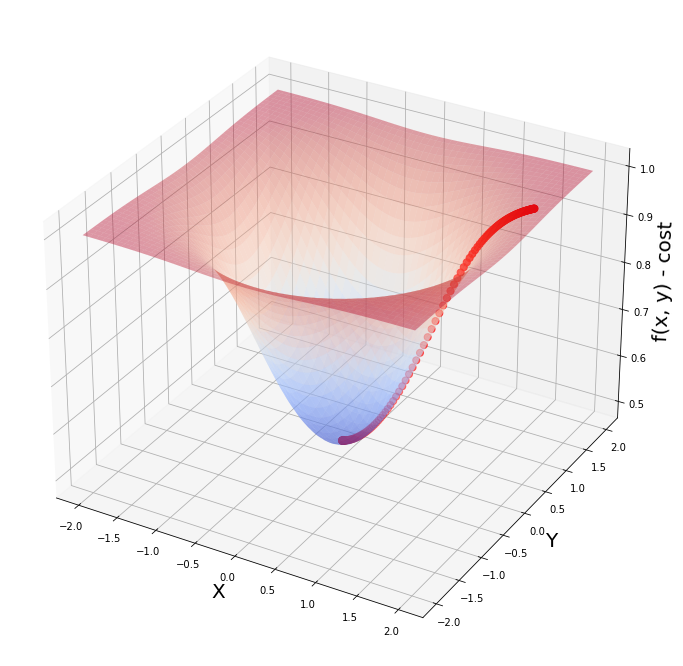

In [243]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('X', fontsize = 20)                            # add label
ax.set_ylabel('Y', fontsize = 20)
ax.set_zlabel('f(x, y) - cost', fontsize = 20)


ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap = cm.coolwarm, alpha = 0.4)  # add color map( from matplotlib import cm)
ax.scatter(values_array[:, 0], values_array[:, 1],
           f(values_array[:, 0], values_array[:, 1]), s = 50, color = 'red')

plt.show()

# Example 5 - Working with Data & a Real Cost Function

## Mean Squared Error: a cost function for regression problem 

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [244]:
# Make the sample data

x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7 ,6.5]]).transpose() # make arrar from 1d to 2d
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1) # make arrar from 1d to 2d

print('The shape of x_5:', x_5.shape)
print('The shape of y_5:', y_5.shape)

The shape of x_5: (7, 1)
The shape of y_5: (7, 1)


In [245]:
# quick linear regression
regr = LinearRegression()
regr.fit(x_5, y_5)

print('Theta 0:', regr.intercept_[0])
print('Theta 0:', regr.coef_[0][0])

Theta 0: 0.8475351486029536
Theta 0: 1.2227264637835915


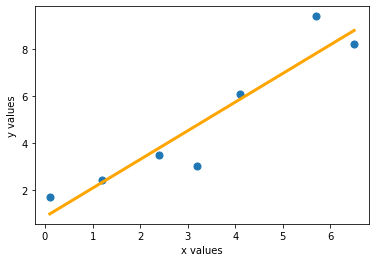

In [247]:
plt.scatter(x_5, y_5, s = 50)

plt.plot(x_5, regr.predict(x_5), color = 'orange', linewidth = 3)

plt.xlabel('x values')
plt.ylabel('y values')

plt.show()

In [251]:
# y-hat = theta0 + theta1 * x
# y = mx + c

y_hat = 0.8475351486029536 + 1.2227264637835915 * x_5

print('Estimated values area: \n', y_hat )
print('In comparison actual y valuesare: \n', y_5)

Estimated values area: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison actual y valuesare: 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [265]:
# function to calculate mean squared error
def mse(y, y_hat):
    #mse_cal = 1/7 * sum((y - y_hat)**2)
    #mse_cal = 1/(y.size) * sum((y - y_hat)**2) # y.size return the length of y
    mse_cal = np.average((y - y_hat)**2, axis = 0)
    return mse_cal

In [269]:
print(mse(y_5, y_hat))                 # using the numpy average function
print(mean_squared_error(y_5, y_hat))  # using the sklearn module
print(mean_squared_error(y_5, regr.predict(x_5)))

[0.94796558]
0.9479655759794577
0.9479655759794577


## 3D Plot for MSE Cost Function

### Make Data for Thetas

In [299]:
nr_thetas = 200
th_0 = np.linspace(start = -1, stop = 3, num = nr_thetas)
th_1 = np.linspace(start = -1, stop = 3, num = nr_thetas)

plot_t0, plot_t1 = np.meshgrid(th_0, th_1)



### Calculation of MSE using nested for loops

In [300]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[i][j])
        y_hat = plot_t0[i][j] + plot_t1[i][j] * x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of t0:', plot_t0.shape)
print('Shape of t1:', plot_t1.shape)
print('Shape of plot_cost:', plot_cost.shape)

Shape of t0: (200, 200)
Shape of t1: (200, 200)
Shape of plot_cost: (200, 200)


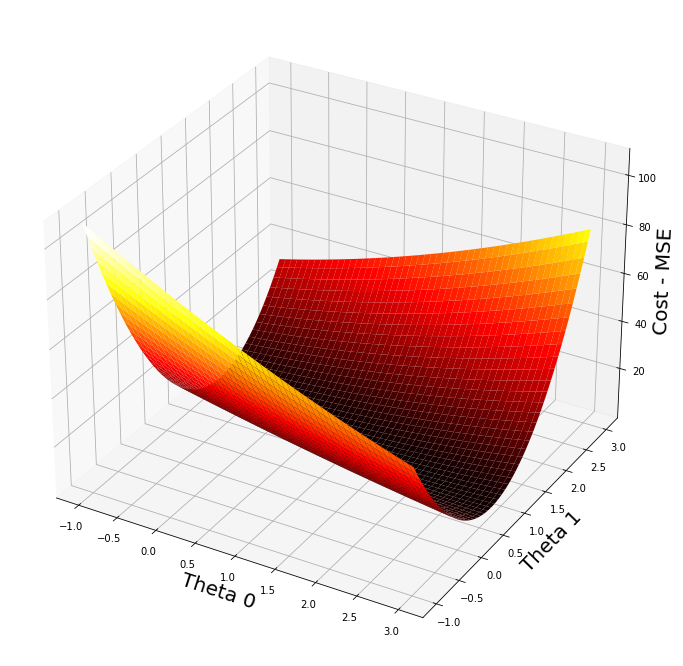

In [303]:
# Plotting Mean Squared error

fig = plt.figure(figsize = [16, 12])
ax = fig.add_subplot(projection = '3d')

ax.set_xlabel('Theta 0', fontsize = 20)
ax.set_ylabel('Theta 1', fontsize = 20)
ax.set_zlabel('Cost - MSE', fontsize = 20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap = cm.hot)

plt.show()

In [312]:
print('Min value of plot cost:', plot_cost.min())

ij_min = np.unravel_index(indices = plot_cost.argmin(), shape = plot_cost.shape)
print('Min occurs at (ij):', ij_min)
print('Min MSE for the theta 0 at plot_t0[111][91]:', plot_t0[111][91])
print('Min MSE for the theta 1 at plot_t1[111][91]:', plot_t1[111][91])

Min value of plot cost: 0.9483826526747164
Min occurs at (ij): (111, 91)
Min MSE for the theta 0 at plot_t0[111][91]: 0.829145728643216
Min MSE for the theta 1 at plot_t1[111][91]: 1.2311557788944723


## Partial Derivatives of MSE respect to $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE} {\partial \theta_0} = -\frac{2}{n} \sum_{i = 1}^n \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$
## $$\frac{\partial MSE} {\partial \theta_1} = -\frac{2}{n} \sum_{i = 1}^n \big(y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big(x^{(i)} \big)$$

## MSE and Gradient Descent

In [319]:
# x values = data, y values = data, and a array of theta parameters(theta 0 at index and theta 1 at index 1)
def grad(x, y, thetas):
    n = y.size
    # mse respect to theta_0
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1] * x)
    # mse respect to theta_1
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1] * x) * x)
    
    #return np.array([theta0_slope[0], theta1_slope[1]])
    #return np.append(arr = theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis = 0)

In [321]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# making variable to collect the data points
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1] * x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    # append new values to vals numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis = 0)
    mse_vals = np.append(arr= mse_vals, values = mse(y_5, thetas[0] + thetas[1] * x_5))

# results
print('Min occurs at theta 0:', thetas[0])
print('Min occurs at theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1] * x_5))

Min occurs at theta 0: 0.8532230461743415
Min occurs at theta 1: 1.2214935332607393
MSE is: [0.94797511]


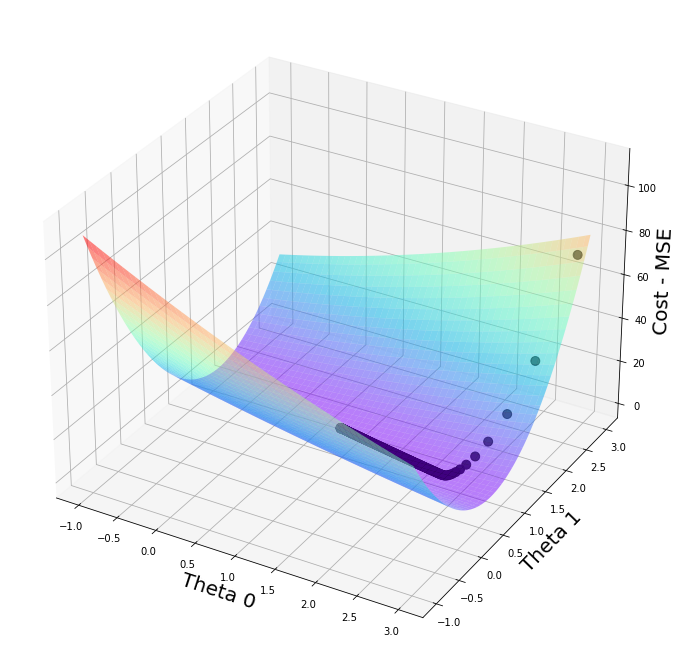

In [330]:
# Plotting Mean Squared error

fig = plt.figure(figsize = [16, 12])
ax = fig.add_subplot(projection = '3d')

ax.set_xlabel('Theta 0', fontsize = 20)
ax.set_ylabel('Theta 1', fontsize = 20)
ax.set_zlabel('Cost - MSE', fontsize = 20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s= 80, color = 'black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap = cm.rainbow, alpha = 0.5)

plt.show()